In [1]:
import numpy as np                    # library for fast linear algebra computation
import matplotlib.pyplot as plt       # library for plotting (i.e, for creating graphs)
import seaborn as snb                 # library for making plots look nice
snb.set()

import plotting                       # custom library for plotting vectors and frames

---------

## Homogeneous Transformations

------

Homogeneous transformation matrices allow us to do three things: <br> 
1) representing reference frames relative to other reference frames, <br>
2) mapping vectors between reference frames (for example, from end effector frame to base frame) <br>
3) mapping representations of reference frames between reference frames

They do this by realizing both a *rotation and a translation* in a single transformation. <br>


In general, a homogeneous transformation matrix has the following form:


$^{A}_{B}\mathbf{T} = \begin{bmatrix} 
\begin{bmatrix}
    &                    &    \\
    &  ^{A}\mathbf{R}    &    \\
    &                    &
\end{bmatrix} &
\begin{bmatrix}
               \\
^{A}\mathbf{t} \\
               \\
\end{bmatrix}  \\
\begin{bmatrix} 
 0    &    \cdots       &  0  \\  
\end{bmatrix} &
1
\end{bmatrix}$, 



Here, $^{A}\mathbf{R}$ is a $(n \times n)$ rotation matrix that rotates frame $[A]$ to have the same orientation as frame $[B]$, <br> 
and $^{A}\mathbf{t} = [t_1, t_2, \cdots, t_n]^T$ is a translation vector pointing from the origin of $[A]$ to the origin of $[B]$. <br>
Both the rotation matrix and the translation vector are defined in reference frame $[A]$.


By multiplying $^{A}_{B}\mathbf{T}$ from the left to an input vector $^{B}\mathbf{p}$ that is defined in reference frame $[B]$, <br>
we obtain the vector $^{A}\mathbf{p}$ defined in $[A]$ that points to the same point as vector $^{B}\mathbf{p}$.

$^{A}\mathbf{p} = ^{A}_{B}T ^{B}\mathbf{p}$
<br>
<br>

#### Dimensionality Shift
Before applying the homogeneous transformation $^{A}_{B}\mathbf{T}$ to the vector $^B\mathbf{p} = [p_1, p_2, \dots, p_n]^T$, <br>
this vector needs to be shifted to a higher dimension by augmenting it with an additional one: $^{B}\mathbf{p'} = [p_1, p_2, \dots, p_n, 1]^T$. <br> 
The resulting vector $^{A}\mathbf{p'} = [p_1, p_2, \dots, p_n, 1]^T$ in frame $[A]$ also has this additional one. <br>
We obtain the vector $^{A}\mathbf{p}$ in the original, lower-dimensional space by simply removing it. 

------------

### Task 1: Homogeneous Transformations in Python
Implement the function get_HT() that constructs and returns a homogeneous transformation matrix $^{A}_{B}\mathbf{T}$. <br>
This matrix maps a vector from the 2D space $[B]$ to the 2D space $[A]$. <br>
Thus, $^{A}_{B}\mathbf{T}$ is a $(3 \times 3)$ matrix that can be applied to 3D inputs, or in other words,
to originally 2D vectors with an augmented one.

The function get_HT() takes as input a rotation angle $\theta$ that indicates how much frame $[A]$ needs to be rotated to have the same orientation as frame $[B]$, <br>
and the input vector $\mathbf{t} = [t_x, t_y]$ that indicates how $[A]$ needs to be translated so that its origin is at the same location as the origin of frame $[B]$.

In [113]:
'''<IMPLEMENT YOUR CODE BELOW!>'''

def get_HT(theta:float, tx:float, ty:float) -> np.ndarray:
    '''
    Returns a homogeneous transformation matrix, realizing a rotation of an input vector 
    with angle theta (in rad) and a translation with vector (tx, ty).
    '''
    return np.array([[ np.cos(theta), -np.sin(theta), tx],
                     [ np.sin(theta),  np.cos(theta), ty],
                     [             0,              0,  1]])
# ---

-------

### Task 2: Relative Representation of Reference Frames

Create a homogeneous transformation $^{A}_{B}\mathbf{T}$ to represent reference frame $[B]$ relative to reference frame $[A]$. <br>
Relative to $[A]$, frame $[B]$ is rotated by $\theta = \pi/4$ and translated by $^A\mathbf{t} = [3, 0]^T$.

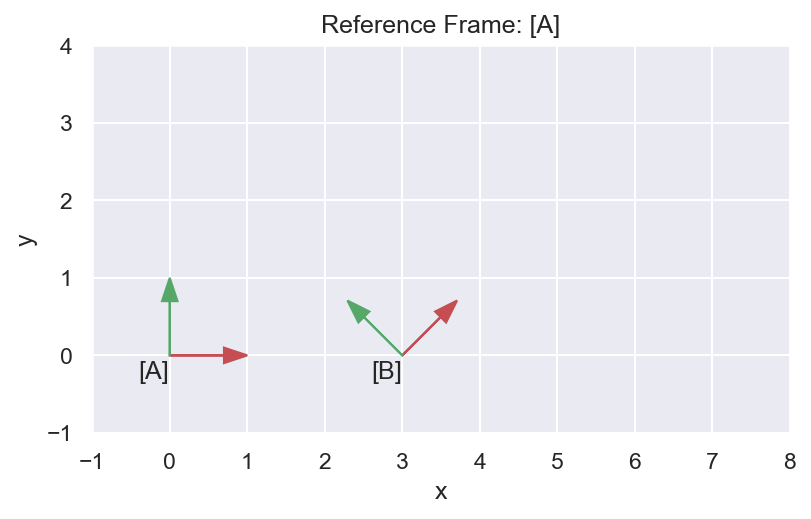

In [114]:
'''
<IMPLEMENT YOUR CODE BELOW!>

Use the function get_HT() from above.
'''
# Create homogeneous transformation that represents frame B relative to frame A
T_A_B = get_HT(np.pi/4, 3, 0)



'''
<UNDERSTAND THE PLOT BELOW!>
It shows reference frame [B] relative to reference frame [A].
'''
# plot frame B in reference frame A
plotting.plot_frame(T_A_B, frame_name='B', rel_frame_name='A')

-------

### Task 3: Relative Representation of Vectors

Create a vector $^{B}\mathbf{p} = [1, 1]^T$ that is defined in reference frame $[B]$. <br>
Tipp: You do this exactly the same way before when you were creating a vector.

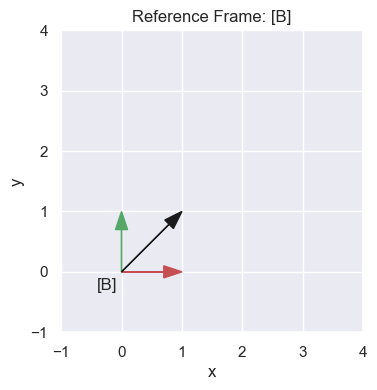

In [97]:
# define vector relative to reference frame [B]
p_B = np.array([1, 1])

# plot vector p_B inside reference frame [B]
plotting.plot_vector(p_B, rel_frame_name='B')

------

### Task 4: Mapping Vectors Between Frames

The vector $^{B}\mathbf{p}$ you created above is defined in reference frame $[B]$. <br>
Thanks to the homogeneous transformation $^{A}_{B}\mathbf{T}$, we know how frame $[B]$ is defined relative to frame $[A]$.

Now, we can use the very same homogeneous transformation $^{A}_{B}\mathbf{T}$ to obtain a vector $^{A}\mathbf{p}$ that is defined in frame $[A]$ <br> and points to the same location (in frame $[A]$) as the vector $^{B}\mathbf{p}$.

We do this by 1) augmenting $^{B}\mathbf{p}$ with an additional one, 2) multiplying $^{A}_{B}\mathbf{T}$ from the left, and 3) removing the augmented one from the resulting vector.

Implement your code at the indicated locations below!

In [105]:
'''<IMPLEMENT YOUR CODE BELOW!>'''


def apply_ht(T:np.ndarray, X:np.ndarray):
    '''
    Applies a homogeneous transformation T to an input X.
    
    1) the input is shifted to another dimension by augmenting it with ones.
    2) the homogeneous transformation is applied.
    3) the output is shifted back by removing the augmented ones.

    :param T:     homogeneous transformation matrix
    :param X:     input (can be vector or a data matrix)
    '''
        
    # 1.) augment input with ones
    if len(X.shape) == 1: 
        # input is a vector
        X_augmented = np.append(X, 1)
    else:                  
        # input is a data matrix
        X_augmented = np.vstack([X, np.ones(X.shape[1])])
    
    
    # 2) apply homogeneous transformation to the shifted
    #    the result of this operation 'Y_augmented' will also be augmented with additional ones
    Y_augmented = T @ X_augmented
    
    
    # 3) remove augmented ones
    if len(X.shape) == 1: 
        # input is a vector
        return Y_augmented[:-1]
    else:
        # input is a data matrix
        return Y_augmented[:-1, :]
# ---

In [106]:
'''
<IMPLEMENT YOUR CODE BELOW!>

Use the function apply_ht() from above.
'''

# Obtain vector p_A (which is defined in frame [A]) by mapping the vector p_B from frame [B] to frame [A]
p_A = apply_ht(T_A_B, p_B)

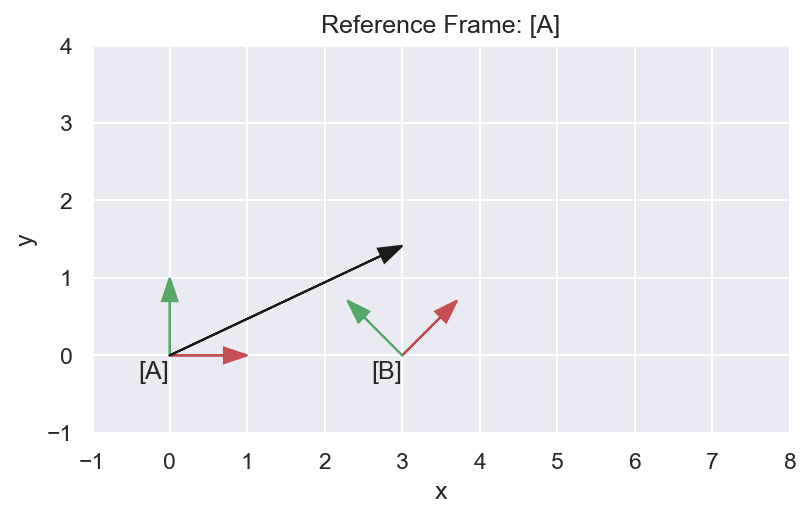

In [107]:
'''
<UNDERSTAND THE PLOT BELOW!>

The plot shows reference frame [B] relative to reference frame [A].
It also shows the vector p_A that was originally defined as vector p_B in frame [B],
but is now defined in frame [A].
'''

# plot reference frame B relative to reference frame A
plotting.plot_frame(T_A_B, frame_name='B', rel_frame_name='A', do_show=False)

# plot vector p_A relative to reference frame A
plotting.plot_vector(p_A, rel_frame_name='B', new_fig=False)

--------

### Task 5: Mapping Data Matrices Between Frames

Since a homogeneous transformations are a specific type of linear transformations, we can apply them not only to a single vector, <br> 
but simultaneously to a whole collection of vectors stored in a data matrix ${^{B}\mathbf{X}}$
whose column vectors (the data points) $^{B}\mathbf{x}_i$ <br>
are defined relative to some reference frame $[B]$.

$^{B}\mathbf{X} = \left[ ^{B}\mathbf{x}_1, {^{B}\mathbf{x}_2}, \dots, {^{B}\mathbf{x}_n} \right]$,

Thus, to map all data points in $^{B}\mathbf{X}$ from frame $[B]$ to frame $[A]$, we can simply multiply the transformation $^{A}_{B}\mathbf{T}$ from the left:

$^{A}\mathbf{X} = ^{A}_{B}\mathbf{T}^{B}\mathbf{X}$

<br>
Let us have a look at a specific data matrix that stores points of a vector image, <br> 
more specifically, it stores the corner points of the house of nicolaus. 

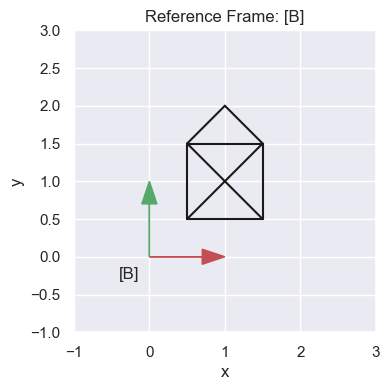

In [108]:
'''<READ AND UNDERSTAND THE CODE BELOW!>'''

# define the corner points of the house of nicolaus
# (every column of this matrix is a data point)
house_B = np.array([[0.5, 0.5, 1.5, 1.5, 1.0, 0.5, 1.5, 0.5, 1.5],
                    [0.5, 1.5, 0.5, 1.5, 2.0, 1.5, 1.5, 0.5, 0.5]])

# let's have a look
plotting.plot_image(house_B, rel_frame_name='B')

In [115]:
'''
<IMPLEMENT YOUR CODE BELOW!>

Again, use the function apply_ht() from above.
'''

# map the house of nicolaus (that is defined in frame [B]) to frame [A]
house_A = apply_ht(T_A_B, house_B)

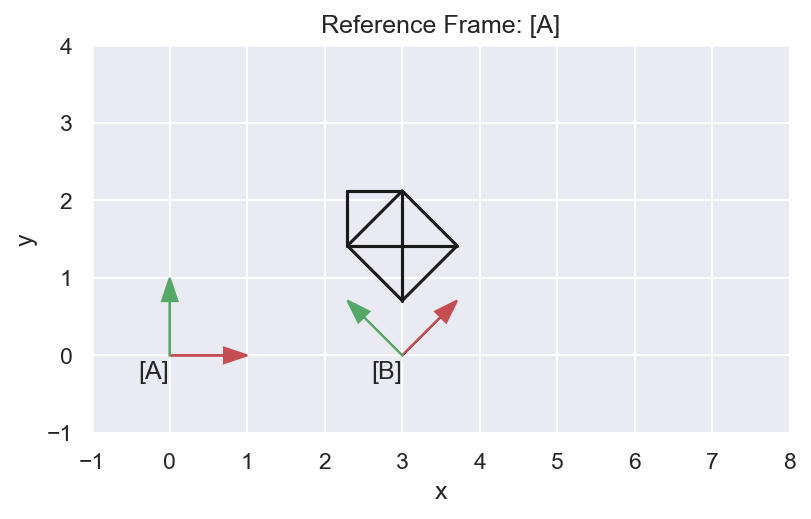

In [116]:
'''
<UNDERSTAND THE PLOT BELOW!>

The plot shows reference frame [B] relative to reference frame [A].
It also shows the house house_A that was originally defined as data matrix house_B in frame [B],
but is now defined in frame [A].
'''

# plot reference frame B relative to reference frame A
plotting.plot_frame(T_A_B, frame_name='B', rel_frame_name='A', do_show=False)

plotting.plot_image(house_A, rel_frame_name='A', new_fig=False)

-----

### Task 6: Mapping Reference Frames between Reference Frames

Let's assume, we have data points stored in a data matrix $^{C}\mathbf{X}$ which are defined relative to reference frame $[C]$. Furthermore, we have a homogeneous transformation $^{B}_{C}\mathbf{T}$ which tells us how frame $[C]$ is defined relative to frame $[B]$. In addition, we know how frame $[B]$ is defined relative to frame $[A]$, which is encoded in the homogeneous transformation $^{A}_{B}\mathbf{T}$.

We would like to be able to map the data points in $^{C}\mathbf{X}$ from frame $[C]$ to frame $[A]$. For this, we need a homogeneous transformation $^{A}_{C}\mathbf{T}$ that defines frame $[C]$ relative to frame $[A]$. In other words, we want frame $[C]$ to be represented in frame $[A]$, instead of frame $[B]$. For this, we need to map the representation of frame $[C]$ which is encoded in $^{B}_{C}\mathbf{T}$ from frame $[B]$ to frame $[A]$. We know that mapping from $[B]$ to $[A]$ is achieved by the homogeneous transformation $^{A}_{B}\mathbf{T}$. Thus, $^{A}_{C}\mathbf{T}$ is obtaiined as follows:

$^{A}_{C}\mathbf{T} = ^{A}_{B}\mathbf{T} {^{B}_{C}\mathbf{T}}$

And therefore, the data points $^{A}\mathbf{X}$ defined relative to frame $[A]$ are obtained like this:

$^{A}\mathbf{X} \ = \ ^{A}_{C}\mathbf{T} ^{C}\mathbf{X} \ = \ ^{A}_{B}\mathbf{T} {^{B}_{C}\mathbf{T}} ^{C}\mathbf{X}$

In other words, we propagate the data points through the different reference frames by using homogeneous transformations to map between consecutive frames.

Relative to frame $[B]$, the frame $[C]$ is rotated by $\theta = \pi/8$ and translated by $^{B}\mathbf{t}=[3, -0.5]^T$.

In [122]:
'''<IMPLEMENT YOUR CODE BELOW>'''

# Represent frame [C] relative to frame [B] as a homogeneous transformation
# Frame C is rotated by pi/8 and translated by [3, -0.5]
T_B_C = get_HT(np.pi/8, 3, -0.5)

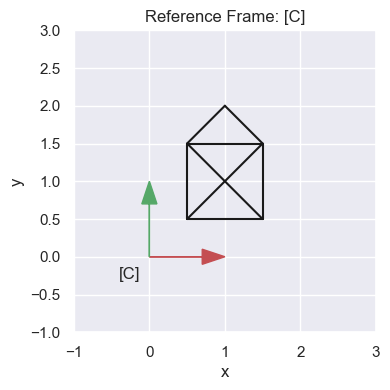

In [123]:
'''<READ AND UNDERSTAND THE CODE BELOW!>'''

# Define the corner points of the house of nicolaus in frame [C]
# (every column of this matrix is a data point)
house_C = np.array([[0.5, 0.5, 1.5, 1.5, 1.0, 0.5, 1.5, 0.5, 1.5],
                    [0.5, 1.5, 0.5, 1.5, 2.0, 1.5, 1.5, 0.5, 0.5]])

# Plot the house of nicolaus in frame [C]
plotting.plot_image(house_C, rel_frame_name='C')

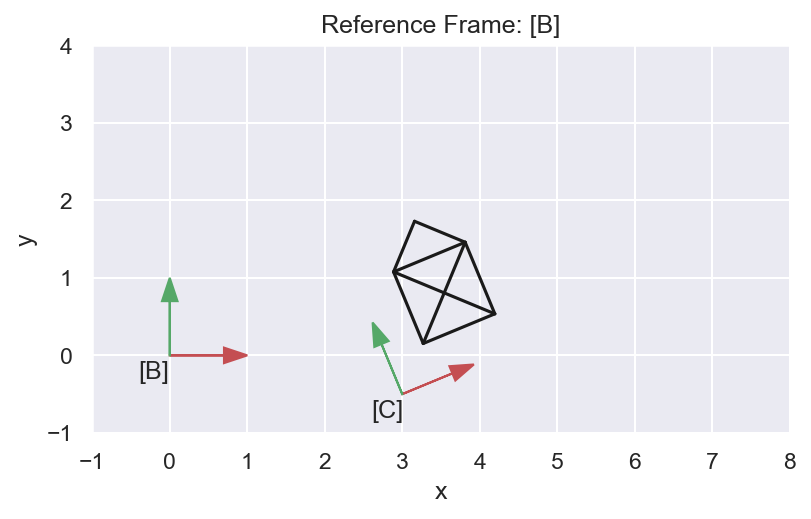

In [125]:
'''
<IMPLEMENT YOUR CODE BELOW!>

Again, use the function apply_ht() from above.
'''

# Map house of nicolaus (that is defined in frame [C]) to frame [B]
house_B = apply_ht(T_B_C, house_C)



'''
<UNDERSTAND THE PLOT BELOW!>

It shows the frame [C] relative to frame [B].
It also shows the house of nicolaus, now defined in frame [B]
'''
# plot frame C in frame B
plotting.plot_frame(T_B_C, frame_name='C', rel_frame_name='B', do_show=False)

# plot house in frame B (house was originally defined in frame C)
plotting.plot_image(house_B, rel_frame_name='B', new_fig=False)

In [126]:
'''
<IMPLEMENT YOUR CODE BELOW!>

Again, use the function apply_ht() from above.
'''

# Represent frame [C] relative to frame [A] as a homogeneous transformation matrix T_A_C.
# For this, use the homogeneous transformation T_A_B that represents frame [B] inside frame [A].
T_A_C = T_A_B @ T_B_C

# Map the house of nicolaus from frame [C] to frame [A]
house_A = apply_ht(T_A_C, house_C)

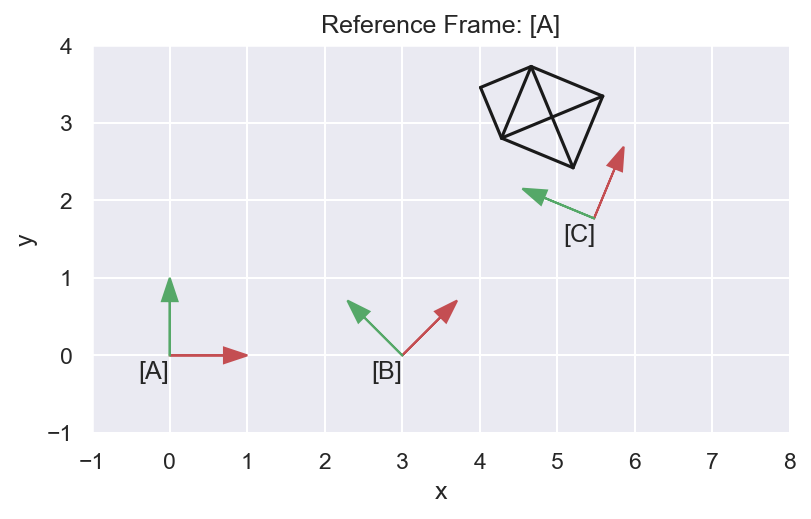

In [128]:
'''
<UNDERSTAND THE PLOT BELOW!>

It shows the frames [B] and [C] relative to frame [A].
It also shows the house of nicolaus, now defined in frame [A]


We can show the house of nicolaus in frame [A], because we defined it in frame [C],
then mapped it from frame [C] to frame [B], and finally from frame [B] to frame [A]. 
For these mappings, we used homogeneous transformations.
'''

# plot frame C in frame A
plotting.plot_frame(T_A_C, frame_name='C', rel_frame_name='A', do_show=False)

# plot frame B in frame A
plotting.plot_frame(T_A_B, frame_name='B', rel_frame_name='A', new_fig=False, do_show=False)

# plot house in frame A (house was originally defined in frame C)
plotting.plot_image(house_A, rel_frame_name='A', new_fig=False)